<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ДЗ:-Временные-ряды" data-toc-modified-id="ДЗ:-Временные-ряды-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ДЗ: Временные ряды</a></span><ul class="toc-item"><li><span><a href="#anti-diabetic-drugs" data-toc-modified-id="anti-diabetic-drugs-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>anti-diabetic-drugs</a></span></li><li><span><a href="#female-births" data-toc-modified-id="female-births-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>female-births</a></span></li><li><span><a href="#shampoo" data-toc-modified-id="shampoo-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>shampoo</a></span></li></ul></li></ul></div>

# ДЗ: Временные ряды



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)


In [ ]:
import statsmodels.api as sm # все, для работы с рядами
from scipy.special import inv_boxcox # обратное преобразование Бокса-Кокса 
from itertools import product # произведения множеств
import warnings # чтобы отключить предупреждения в Python

Есть 3 датасета с временными рядами
- В `anti-diabetic-drugs.csv` содержатся данные о ежемесячных продажах антидиабетических препаратов в Австралии с 1992 по 2008 год. 
- В `female-births.csv` содержатся данные о количестве новорожденных детей женского пола в 1959 году в Калифорнии. 
- В `shampoo.csv` содержатся данные о ежемесячных продажах шампуня за трехлетний период. 


Проанализируйте каждый из этих рядов и постройте модель SARIMA, чтобы сделать прогноз
- для `anti-diabetic-drugs.csv` - на один год вперед
- для `female-births.csv` - на один месяц вперед
- для `shampoo.csv` - на 3 месяца вперед

Для этого 
- рассмотрите необходимость стабилизации дисперссии и необходимость дифференцирования ряда
- проанализируйте ACF и PACF и подберите гиперпараметры SARIMA
- обучите модель SARIMA с наилучшими гиперпараметрами
- проанализируйте остатки модели

Ваши решения необходимо сопроводить краткими комментариями и выводами, которые Вы сделали на основе анализа. Не забывайте о построении графиков! 

Ориентируйтесь на пример анализа временного ряда в ноутбуке с последнего занятия.

## anti-diabetic-drugs

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


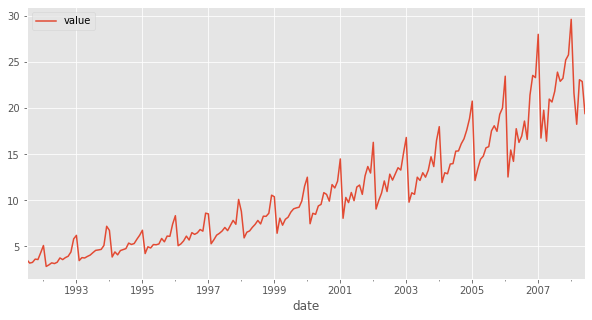

In [ ]:
df = pd.read_csv('anti-diabetic-drugs.csv', index_col='date', parse_dates=['date'])
df.plot();
df.head()

## female-births

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


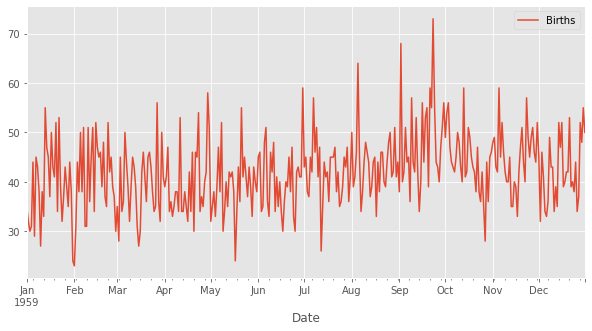

In [ ]:
df = pd.read_csv('female-births.csv', index_col=['Date'], parse_dates=['Date'])
df.plot();
df.head()

## shampoo

,Sales
Date,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


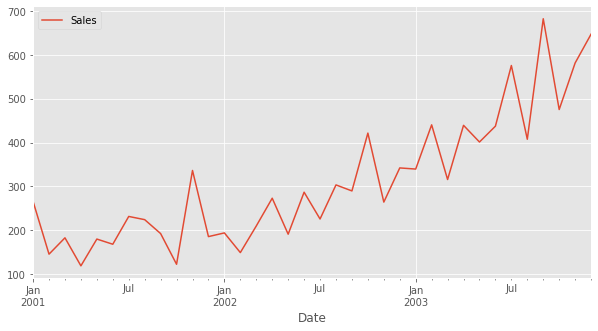

In [ ]:
df = pd.read_csv('shampoo.csv')
df['Date'] = pd.to_datetime('200'+df['Month']+'-01')
df = df.set_index('Date').drop('Month',axis=1)
df.plot();
df.head()